In [ ]:
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.preprocessing.image import image 
#import tensorflow as tf
#import matplotlib.pyplot as plt
#import cv2
#import os 
#import numpy as np 

In [ ]:
import numpy 
import cv2

In [ ]:
import os 
import random 
import matplotlib.pyplot as plt
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
DIRECTORY = '/content/drive/MyDrive/mam_4thsem'
CATEGORIES = ['augmine1','augmine2','augmine4','augmine5','augmine6','augmine7','augmine8','augmine9','augmine10','augmine11','augmine12','augmine13']


/content/drive/MyDrive/mam_4thsem/augmine1
/content/drive/MyDrive/mam_4thsem/augmine2
/content/drive/MyDrive/mam_4thsem/augmine4
/content/drive/MyDrive/mam_4thsem/augmine5
/content/drive/MyDrive/mam_4thsem/augmine6
/content/drive/MyDrive/mam_4thsem/augmine7
/content/drive/MyDrive/mam_4thsem/augmine8
/content/drive/MyDrive/mam_4thsem/augmine9
/content/drive/MyDrive/mam_4thsem/augmine10


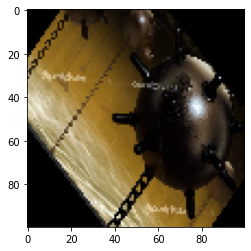

In [ ]:
IMG_SIZE = 100
data = [] 
for category in CATEGORIES:
  folder = os.path.join(DIRECTORY,category)
  print(folder)
  label = CATEGORIES.index(category)
  for img in os.listdir(folder):
    img_path = os.path.join(folder,img)
    img_arr = cv2.imread(img_path)
    try:
      img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
    except:
      continue
    plt.imshow(img_arr)
    data.append([img_arr, label])

In [ ]:
random.shuffle(data)

In [ ]:
X = []
y = []
for features,label in data:
  X.append(features)
  y.append(label)

In [ ]:
import numpy as np
X=np.array(X)
y=np.array(y)

In [ ]:
len(X)
#len(y)

1971

In [ ]:
len(y)

1971

In [ ]:
pickle.dump(X,open('X.pkl','wb'))
pickle.dump(y,open('y.pkl','wb'))

In [ ]:
X = pickle.load(open('X.pkl','rb'))
y = pickle.load(open('y.pkl','rb'))

In [ ]:
X = X/255


In [ ]:
X

array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.00392157]

In [ ]:
X.shape

(1971, 100, 100, 3)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
##########################################################1##########################################################

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(128, input_shape = X.shape[1:], activation = 'relu'))
model.add(Dense(9, activation ='softmax'))


In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(X,y, epochs = 10, validation_split = 0.1)

Epoch 1/10
56/56 [==============================] - 13s 25ms/step - loss: 0.9227 - accuracy: 0.6458 - val_loss: 0.3766 - val_accuracy: 0.8586
Epoch 2/10
56/56 [==============================] - 1s 17ms/step - loss: 0.3187 - accuracy: 0.8821 - val_loss: 0.3272 - val_accuracy: 0.8788
Epoch 3/10
56/56 [==============================] - 1s 17ms/step - loss: 0.1963 - accuracy: 0.9323 - val_loss: 0.2417 - val_accuracy: 0.8889
Epoch 4/10
56/56 [==============================] - 1s 20ms/step - loss: 0.0778 - accuracy: 0.9741 - val_loss: 0.2518 - val_accuracy: 0.8838
Epoch 5/10
56/56 [==============================] - 1s 24ms/step - loss: 0.0725 - accuracy: 0.9763 - val_loss: 0.2392 - val_accuracy: 0.9141
Epoch 6/10
56/56 [==============================] - 1s 23ms/step - loss: 0.0336 - accuracy: 0.9938 - val_loss: 0.2069 - val_accuracy: 0.9242
Epoch 7/10
56/56 [==============================] - 1s 21ms/step - loss: 0.0201 - accuracy: 0.9966 - val_loss: 0.1936 - val_accuracy: 0.9293
Epoch 8/10
5

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


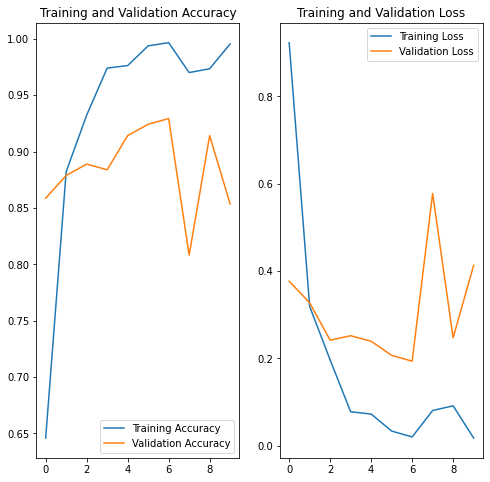

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = 10
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
sunflower_path = '/content/drive/MyDrive/mam_4thsem/mine5_233.jpg'
#sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)
import tensorflow as tf
#img = tf.keras.utils.load_img(
 #   sunflower_path, target_size=(IMG_SIZE, IMG_SIZE)
#)
#try:
img_arr = cv2.imread(img_path)
img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
#except:
 # continue
#img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_arr, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(CATEGORIES[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to augmine5 with a 25.36 percent confidence.
